<a id="Introduction"></a>
# **Introduction**
Machine Learning algorithms will be used to predict whether the fine needle aspirate (FNA) of a breast mass is benign (B) or malignant (M) usign the Breast Cancer Wisconsin (Diagnostic) DataSet.

For each digitized image of the FNA, the following is computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error (SE) and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.


In [1]:

import numpy as np  #linear algebra
import pandas as pd ## data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl #to plot the graph
import matplotlib.pyplot as plt #to plot the graph
import seaborn as sns #for plot interactive graph

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #splits data into two parts
from sklearn.model_selection import GridSearchCV #searches over specified parameter values
from sklearn.model_selection import KFold #cross validation
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.ensemble import RandomForestClassifier #for random forest classifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB #model parameClassifier implementing the k-nearest neighbors voteters via partial fit
from sklearn.neighbors import KNeighborsClassifier as KNN #classifier implementing the k-nearest neighbors vote
from sklearn.tree import DecisionTreeClassifier #decision tree classifier
from sklearn import svm #for Support Vector Machine algorithms
from sklearn import metrics #for evaluating the quality and accuracy of the model
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler #to scale the data
from sklearn.preprocessing import StandardScaler #to scale the data
from pandas import DataFrame
from sklearn.svm import SVC


<a id="Import Data"></a>
# **Import Data**

Save the file path and store the data

In [2]:
#save file path

dataset_file_path = '/kaggle/input/breast-cancer-wisconsin-data/data.csv'

#read and store the data

dataset = pd.read_csv(dataset_file_path)


<a id="Data_Analysis"></a>
# **Data Analysis**

We will print and clean up the dataset so that we can analyze it further.

In [3]:
#print out the dataset to visualize it

dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
#Look at how many rows and what each row contains

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#view the top 5 rows

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Now that the dataset has been printed out, we can analyze the data. 

There are 569 entries and 33 data columns. 

"32 unnamed" column containing "null" - which can be removed.

The "id" is the ID number for each specimen, which is not relevant to our analysis and can be removed.

In [6]:
#drop the 32 unnamed rows

dataset.drop("Unnamed: 32",axis=1,inplace=True)

In [7]:
#drop the id column

dataset.drop("id",axis=1,inplace=True)

In [8]:
#print out the columns to check that the unnamed rows and id column have been dropped.

dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
#now that it has been cleaned up, print out the dataset again to visualize it 
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#Now divide the data into the three categories described above - the mean, standard error (SE) and worst (largest, mean of the 3 largest values)

data_mean = list(dataset.columns[1:11])
data_se = list(dataset.columns[11:21])
data_worst = list(dataset.columns[21:31])

print(data_mean)
print("----------------------------------------------------------------------------------------------------")
print(data_se)
print("----------------------------------------------------------------------------------------------------")
print(data_worst)


['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
----------------------------------------------------------------------------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
----------------------------------------------------------------------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
#Now map the data according to the diagnosis labels B (benign) and M (malignant), with B mapped as 0 and M mapped as 1.

dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M':1})

dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<a id="Data_Visualization"></a>
# **Data Visualization**



We will create graphs and plots to visualize the data. 

How is the data distributed between benign and malignant diagnoses?

In [12]:
# with 0 = benign, 1 = malignant
dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

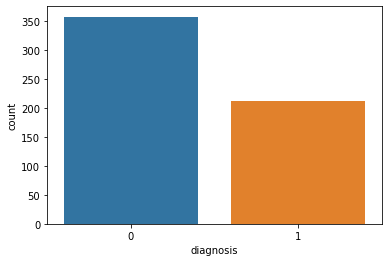

In [13]:
sns.countplot(x='diagnosis',data=dataset)
plt.title=('Breast Cancer Diagnosis')
plt.show()

From the dataset, there are more benign cases than malignant cases in our data sample. 

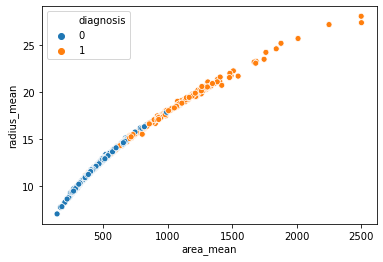

In [14]:
# create a scatterplot to map the data 
sns.scatterplot(x = 'area_mean', y = 'radius_mean', hue = 'diagnosis', data = dataset)
plt.show()

From the above plot, we can see how the data is distributed. As the **area_mean** and **radius_mean** values increase, the percent of malignant cases also increase, indicating a higher likelihood of being diagnosed with cancer. 

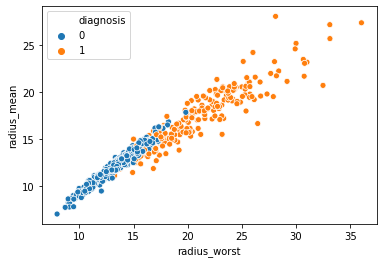

In [15]:
# create a scatterplot for radius_worst and radius_mean
sns.scatterplot(x = 'radius_worst', y = 'radius_mean', hue = 'diagnosis', data = dataset)
plt.show()

Again, similar to the previous plot, we can see that as the **radius_worst** and **radius_mean** values increase, the percent of malignant cases also increases, meaning the greater the radius and the area of the breast mass, the greater the chance that it is malignant from our sample size.

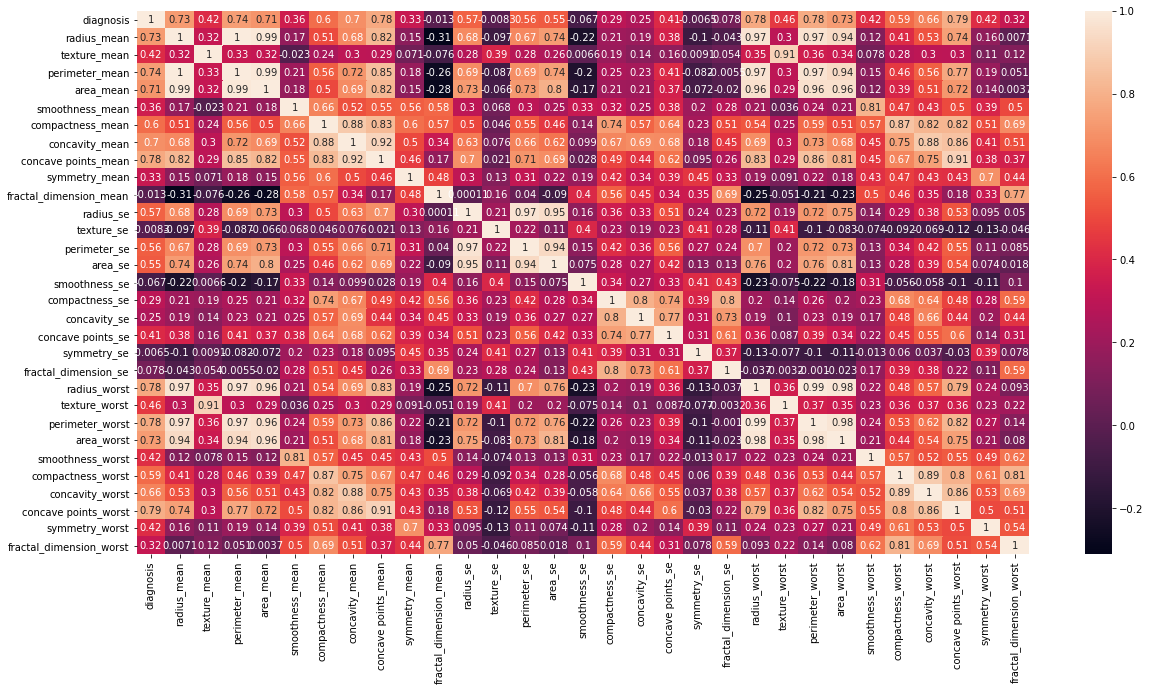

In [16]:
# create a correlation graph to find correlations among the different features of the dataset

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

From the above plot, we can see the features that are highly correlated with each other. For example, radius_mean is highly correlated with perimeter_mean, area_mean, radius_worst, perimeter_worst and area_worst. We can drop these and use only radius_mean. 

We will create a new dataset that reflects this change, which we can later compare with our original dataset if there are any differences in prediction.

In [17]:
new_dataset = dataset.drop(['perimeter_mean', 'area_mean', 
                            'radius_worst', 'perimeter_worst', 
                            'area_worst', 'perimeter_se', 'area_se', 
                            'texture_worst', 'concave points_worst', 
                            'concavity_mean', 'compactness_worst'], axis =1)

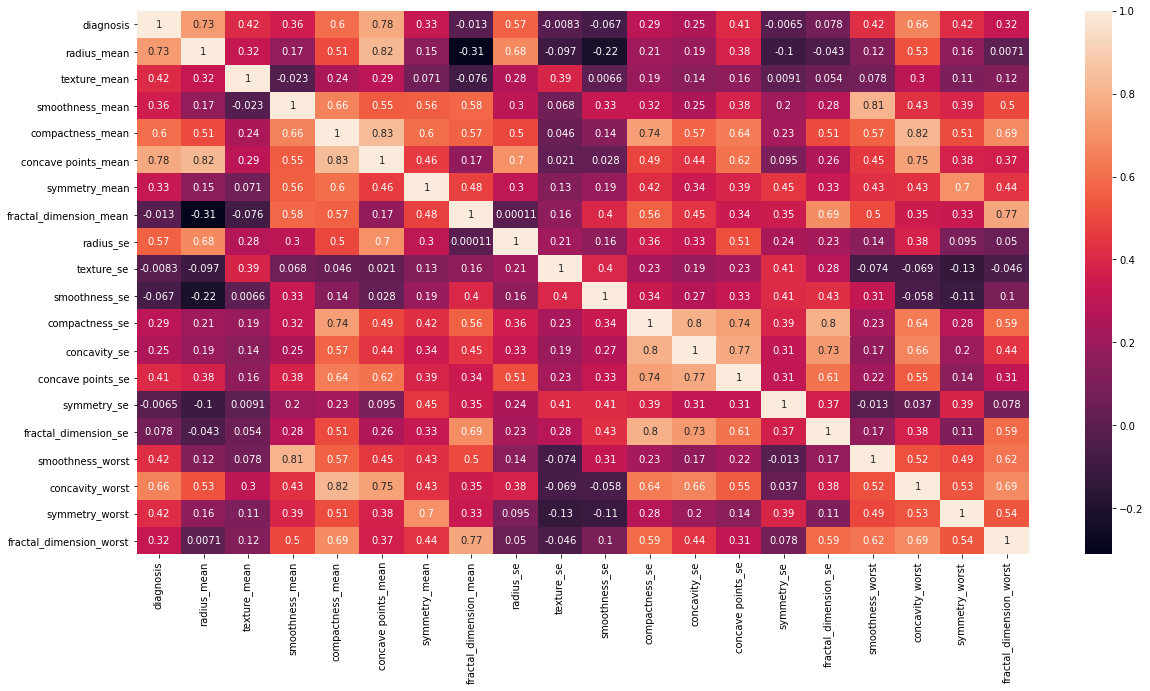

In [18]:
#Print out the new dataset, which should show that the highly correlated features have been removed.
plt.figure(figsize=(20,10))
sns.heatmap(new_dataset.corr(), annot=True)
plt.show()

We can see from the new_dataset heatmap that the most highly correlated features of the dataset have now been removed.

**Create a new testing data set and a training data set.**

In [19]:
#Create a new dataset and remove the diagnosis feature so it can be used for our testing and training sets

X = new_dataset.drop(['diagnosis'], axis =1)
Y = new_dataset['diagnosis']

X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [20]:
#Split the dataset into 70% train and 30% test to create a training dataset and a testing dataset. Set seed to allow the randomness to be reproduced
SEED = 123 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = SEED)

<a id="Data_Scaling"></a>
# **Feature Scaling**

The features in our dataset vary in levels of maginitude, range and units of measurement. Certain machine learning algorithms are sensitive to differences in magnitude, so we will need to scale the data so that it fits within the specific scale (for example, 0-1 or 0-100) and all parts of the datset are within the same magnitude.

In [21]:
#Normalize the data, fit the scaler on the training dataset

norm = MinMaxScaler().fit(X_train)

#Transform the training dataset

X_train_norm = norm.transform(X_train)

#Transform testing dataset

X_test_norm = norm.transform(X_test)

In [22]:
DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.327120,0.312235,0.391434,0.244665,0.243940,0.379576,0.270380,0.123102,0.248991,0.155209,0.223468,0.083544,0.231014,0.181519,0.103643,0.337761,0.213977,0.258041,0.238335
std,0.177224,0.154261,0.124859,0.164689,0.190657,0.146339,0.155682,0.110537,0.156783,0.108845,0.174788,0.084026,0.122939,0.116011,0.099168,0.160640,0.163579,0.122867,0.143527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.198261,0.200952,0.301052,0.124146,0.102957,0.274242,0.160120,0.049302,0.136179,0.089441,0.103474,0.037203,0.149844,0.100193,0.047450,0.221175,0.093031,0.178691,0.132269
50%,0.295200,0.294810,0.383858,0.208592,0.166277,0.365152,0.240944,0.088914,0.224079,0.128658,0.171084,0.066275,0.212446,0.157567,0.080901,0.330012,0.179553,0.243249,0.208121
75%,0.422551,0.398356,0.468945,0.323612,0.367048,0.454545,0.341933,0.165561,0.322289,0.194375,0.289400,0.105947,0.288028,0.226480,0.126997,0.427839,0.302875,0.309038,0.309300
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above dataset, we can see that the features columns are now between 0 (min value) and 1 (max value).

In [23]:
#Standardize the data, fit scaler on training dataset

stdscale = StandardScaler().fit(X_train)

#Transform the training dataset

X_train_std = stdscale.transform(X_train)

#Transform testing dataset

X_test_std = stdscale.transform(X_test)

In [24]:
DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.216375e-16,-5.467430e-17,1.779704e-16,-3.019639e-16,1.559333e-16,8.089565e-17,6.689233e-16,1.291541e-16,3.107509e-16,-2.719767e-17,-2.343184e-17,-1.107434e-16,3.104719e-16,-9.712359e-16,-2.058655e-16,5.645958e-16,-8.331031e-17,-5.495325e-17,5.007162e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.848126e+00,-2.026620e+00,-3.138956e+00,-1.487486e+00,-1.281082e+00,-2.597079e+00,-1.738928e+00,-1.115072e+00,-1.590123e+00,-1.427763e+00,-1.280122e+00,-9.955137e-01,-1.881450e+00,-1.566633e+00,-1.046440e+00,-2.105247e+00,-1.309746e+00,-2.102806e+00,-1.662654e+00
25%,-7.280122e-01,-7.223062e-01,-7.247834e-01,-7.327193e-01,-7.403884e-01,-7.206975e-01,-7.091281e-01,-6.684890e-01,-7.204489e-01,-6.050010e-01,-6.873773e-01,-5.521990e-01,-6.610737e-01,-7.018984e-01,-5.673562e-01,-7.266713e-01,-7.403063e-01,-6.466321e-01,-7.399274e-01
50%,-1.803404e-01,-1.131025e-01,-6.074581e-02,-2.193102e-01,-4.078544e-01,-9.869251e-02,-1.893177e-01,-3.096794e-01,-1.590892e-01,-2.442395e-01,-3.000820e-01,-2.057771e-01,-1.512237e-01,-2.067150e-01,-2.296137e-01,-4.829589e-02,-2.107111e-01,-1.205463e-01,-2.107750e-01
75%,5.391499e-01,5.589866e-01,6.215714e-01,4.799786e-01,6.465186e-01,5.129458e-01,4.601912e-01,3.846020e-01,4.681056e-01,3.602885e-01,3.776846e-01,2.669514e-01,4.643451e-01,3.880515e-01,2.357959e-01,5.614545e-01,5.441423e-01,4.155794e-01,4.950571e-01
max,3.801555e+00,4.464066e+00,4.880172e+00,4.592208e+00,3.970554e+00,4.244976e+00,4.692497e+00,7.943036e+00,4.796156e+00,7.771210e+00,4.448302e+00,1.092050e+01,6.262880e+00,7.064071e+00,9.050151e+00,4.127707e+00,4.811215e+00,6.046304e+00,5.313463e+00


After standardizing the data, we can see that all of the columns have a standard deviation of 1.

<a id="Model Selection"></a>
# **Model Selection**

In [25]:
#Create individual classifiers
lr = LogisticRegression(max_iter = 500, n_jobs = -1, random_state = SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state = SEED)
svc = SVC(kernel = 'rbf', probability = True, random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)

#Create a list called classifier containing tuples (classifier_name,classifier)
classifiers = [('Logistic Regression', lr),
              ('K Nearest Neighbors', knn),
              ('SVM', svc),
              ('Random Forest Classifier', rf),
              ('Decision Tree', dt)]

**Model prediction without normalization or standardization**

In [26]:
#Iterate over the tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, Y_train)
    #predict the labels of the test set
    y_pred = clf.predict(X_test)
    #evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(Y_test, y_pred)))

Logistic Regression : 0.942
K Nearest Neighbors : 0.901
SVM : 0.860
Random Forest Classifier : 0.965
Decision Tree : 0.901


**Model prediction with normalized data**

In [27]:
#Iterate over the tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train_norm, Y_train)
    #predict the labels of the test set
    y_pred = clf.predict(X_test_norm)
    #evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(Y_test, y_pred)))

Logistic Regression : 0.971
K Nearest Neighbors : 0.971
SVM : 0.982
Random Forest Classifier : 0.965
Decision Tree : 0.901


**Model prediction with standardized data**

In [28]:
#Iterate over the tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train_std, Y_train)
    #predict the labels of the test set
    y_pred = clf.predict(X_test_std)
    #evaluate the accuracy of clf on the test set
    print('{:s} :{:.3f}'.format(clf_name, accuracy_score(Y_test, y_pred)))

Logistic Regression :0.994
K Nearest Neighbors :0.977
SVM :0.994
Random Forest Classifier :0.965
Decision Tree :0.901


Using the different machine learning algorithms, we can determine the accuracy that our models predict breast cancer. 

The following is observed in the above accuracy scores. Random Forest Classifier and Decision Tree remained the same for each of the model predictions, thus they are not responsive to feature scaling.

However, Logistic Regression, KNN and SVM were responsive to feature scaling. This is because they are distance-based algorithms (looking at the distance between data to determine if they are similiar), and are sensitive to features with higher magnitude. 

We were able to get the highest accuracy with Logistic Regression and SVM. 



We will then create a Confusion Matrix to further describe the performance of our classification model. 

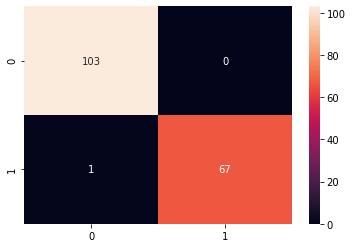

In [29]:
#confusion matrix for logistic regression
con_mat = confusion_matrix(Y_test, lr.predict(X_test_std))
sns.heatmap(con_mat, annot=True, fmt = "d")
plt.show()

In the above confusion matrix, 0 represents the 103 benign cases, and 1 represents the 68 malignant cases. The logistic regression model correctly predicted 103 benign cases and 67 malignant cases, and only incorrectly predicted 1 malignant case.

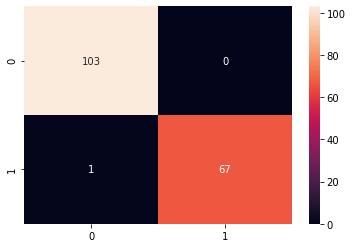

In [30]:
#confusion matrix for SVM
con_mat = confusion_matrix(Y_test, svc.predict(X_test_std))
sns.heatmap(con_mat, annot = True, fmt = "d")
plt.show()

In the above confusion matrix, 0 represents the 103 benign cases, and 1 represents the 68 malignant cases. The SVM model correctly predicted 103 benign cases and 67 malignant cases, and only incorrectly predicted 1 malignant case. 